## Abstract

Are you going to go to Seattle to family/on holiday or for any other reason? Are you wondering about accommodation? Are you curious what are the prices in this city? That's the right place for you! In this kernel we will do analysis offer of Seattle rooms/apartments on Airbnb.

Will be figuring out how to pick the best room based on the reviews and price.
Also, most popular type of accomodations, highest density of accomdation

We will be performing various models like linear model, logistic model, multi-colinearity on the dataset and get the predictions of how results vary and what type of rooms are famous and preferred in Seattle.


In [173]:
pwd

'C:\\Users\\surak\\OneDrive\\Desktop\\ADS_Assignments\\Assignment_2_SurakshaJadhav'

In [174]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge

from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels as statm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Data Cleaning Checklist

### Saving Original Data

Below is the dataset where the empty rows have been replaced with zero.

In [175]:
df = pd.read_csv("seattle_02.csv")

### Listing the type of data present in data frame

In [176]:
df.get_dtype_counts()

float64    2
int64      6
object     4
dtype: int64

In [177]:
df.head()

,Serial No,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,name,currency,rate_type
0,0,1,"Seattle, WA, United States",21,5.0,8,4,2.5,250,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,1,"Seattle, WA, United States",1,0.0,4,2,1.0,100,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,0,"Seattle, WA, United States",63,4.5,2,1,1.0,82,Sunrise in Seattle Master Suite,USD,nightly
3,3,1,"Seattle, WA, United States",462,5.0,2,0,1.0,49,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,1,"Seattle, WA, United States",134,4.5,2,1,1.0,90,"Fab, private seattle urban cottage!",USD,nightly


We have room_id, host_id, last_modified, latitude, longitude and location which won't be of any use. So we remove these columns as a part data cleaning process.

## 1 - Entire home/apt
## 0 - Private room
## 2 - Shared room


## Identifying missing data

In [178]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Serial No               0
room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
name                    0
currency                0
rate_type               0
dtype: int64

### This indicates there is no missing data in the dataset, also no bad data is there in data frame.

In [179]:
df.describe()

,Serial No,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
count,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000
mean,3973.628828,0.773627,47.657999,3.899947,3.682946,1.385428,1.307352,113.024419
std,2297.417603,0.457396,65.889329,1.932701,2.332280,1.009823,0.640965,122.481780
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000
25%,1981.750000,1.000000,4.000000,4.500000,2.000000,1.000000,1.000000,65.000000
50%,3970.500000,1.000000,21.000000,5.000000,3.000000,1.000000,1.000000,88.000000
75%,5945.250000,1.000000,64.000000,5.000000,4.000000,2.000000,1.500000,125.000000
max,7974.000000,2.000000,687.000000,5.000000,28.000000,8.000000,8.000000,5900.000000


Text(0.5, 1.0, 'Top room_types in Airbnb')

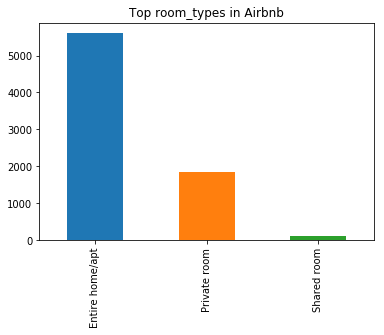

In [180]:
df.room_type.value_counts().head(20).plot.bar()
plt.xticks([0, 1, 2], ('Entire home/apt', 'Private room', 'Shared room'))
plt.title("Top room_types in Airbnb")

It shows that most people prefer Entire home/apartment as their first preference while searching for Airbnbs in Seattle.

### 1 - Entire home/apt
### 0 - Private room
### 2 - Shared room

In [181]:
df[df.price.isin(df.price.nlargest())].sort_values(['address','reviews','overall_satisfaction','bedrooms','bathrooms','price','room_type'])

,Serial No,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,name,currency,rate_type
5691,5956,1,"Kirkland, WA, United States",2,0.0,8,3,3.5,2800,Waterfront luxury - your own private resort!,USD,nightly
71,73,1,"Mercer Island, WA, United States",2,0.0,10,3,4.5,5900,Luxury Waterfront Mansion,USD,nightly
3994,4187,1,"Seattle, WA, United States",0,0.0,12,6,6.0,3000,Mega yacht,USD,nightly
3069,3220,1,"Seattle, WA, United States",2,0.0,15,5,3.5,1395,Seattle Executive Home for Large Gatherings,USD,nightly
4260,4475,1,"Seattle, WA, United States",3,5.0,16,8,6.0,1650,Spacious Family-Friendly Tri-Plex with Views i...,USD,nightly


This shows the top five Airbnbs are in Kirkland, Mercer Island and Seattle.

In [182]:
df.corr()

,Serial No,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
Serial No,1.000000,0.049197,-0.511457,-0.411799,0.035299,0.000347,-0.003382,-0.055501
room_type,0.049197,1.000000,-0.048883,-0.048025,0.322152,0.165773,0.157875,0.183045
reviews,-0.511457,-0.048883,1.000000,0.361947,-0.068578,-0.142822,-0.119952,-0.128034
overall_satisfaction,-0.411799,-0.048025,0.361947,1.000000,-0.012866,-0.043821,-0.082298,-0.088495
accommodates,0.035299,0.322152,-0.068578,-0.012866,1.000000,0.801533,0.546785,0.447689
bedrooms,0.000347,0.165773,-0.142822,-0.043821,0.801533,1.000000,0.623808,0.462481
bathrooms,-0.003382,0.157875,-0.119952,-0.082298,0.546785,0.623808,1.000000,0.425678
price,-0.055501,0.183045,-0.128034,-0.088495,0.447689,0.462481,0.425678,1.000000


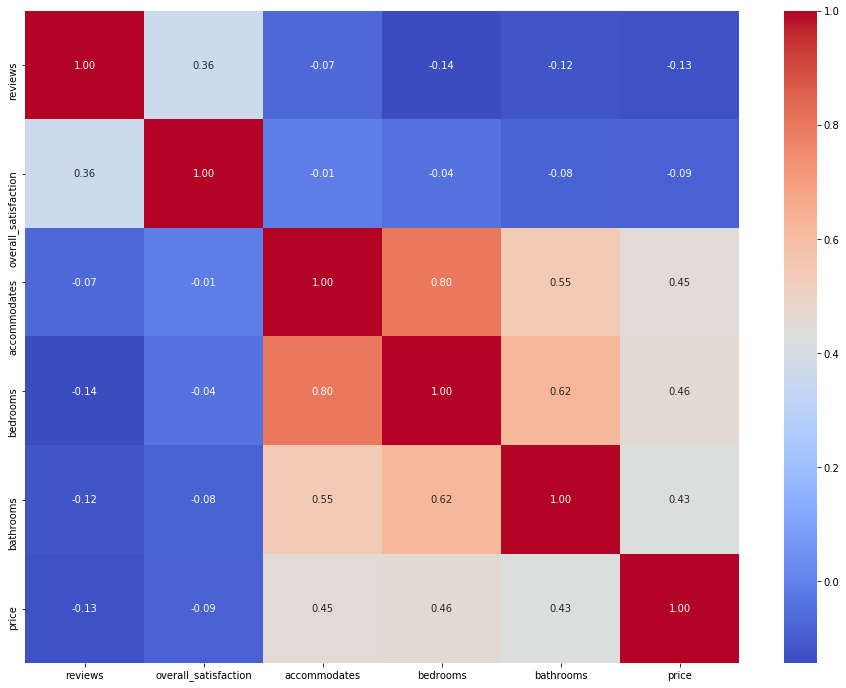

In [183]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [184]:
# choose attributes which shows relation
x = df[['room_type','address','reviews','overall_satisfaction','accommodates',
        'bedrooms','bathrooms','price','name']]

C:\Users\surak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


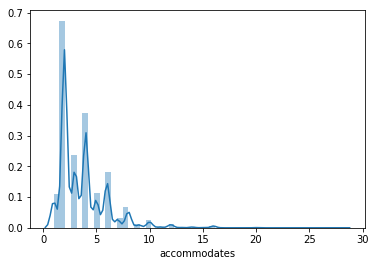

In [185]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numericdataX = df.select_dtypes(include=numerics)
x= numericdataX['accommodates']
sns.distplot(x);

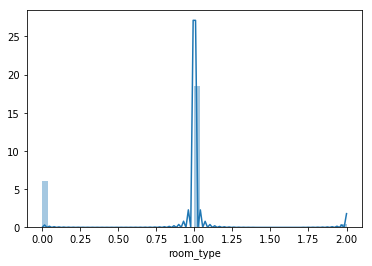

In [186]:
x= numericdataX.iloc[:,1]
sns.distplot(x);

In [187]:

#check categorical data
df.describe(include=['O'])

,address,name,currency,rate_type
count,7576,7576,7576,7576
unique,27,7376,1,1
top,"Seattle, WA, United States",Executive Apt near Facebk/Amzn/Goog,USD,nightly
freq,6710,24,7576,7576


In [188]:
#check numeric data
df.describe()

,Serial No,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
count,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000
mean,3973.628828,0.773627,47.657999,3.899947,3.682946,1.385428,1.307352,113.024419
std,2297.417603,0.457396,65.889329,1.932701,2.332280,1.009823,0.640965,122.481780
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000
25%,1981.750000,1.000000,4.000000,4.500000,2.000000,1.000000,1.000000,65.000000
50%,3970.500000,1.000000,21.000000,5.000000,3.000000,1.000000,1.000000,88.000000
75%,5945.250000,1.000000,64.000000,5.000000,4.000000,2.000000,1.500000,125.000000
max,7974.000000,2.000000,687.000000,5.000000,28.000000,8.000000,8.000000,5900.000000


In [189]:

df.columns

Index(['Serial No', 'room_type', 'address', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'name', 'currency',
       'rate_type'],
      dtype='object')

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
df.columns

Index(['Serial No', 'room_type', 'address', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'name', 'currency',
       'rate_type'],
      dtype='object')

In [192]:
X=df[['reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price']]

In [193]:
Y=df['room_type']

In [194]:
# check X and Y shape
print('X Shape:', X.shape)
print('Y Shape:', Y.shape)

X Shape: (7576, 6)
Y Shape: (7576,)


In [195]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2018)

In [196]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (5075, 6)
X_test Shape: (2501, 6)
y_train Shape: (5075,)
y_test Shape: (2501,)


# Linear Model

In [197]:
 def data_model(xdata):
    #add constant to data
    X = sm.add_constant(xdata)
    targetY=df[['room_type']]
    y = targetY
# Fit the linear model
model = linear_model.LinearRegression()

results = model.fit(X_train, y_train)
print(results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [198]:
# Print the coefficients
print (results.intercept_, results.coef_)

0.5858088624004684 [-0.00015146 -0.01097348  0.09965701 -0.13608593  0.03118769  0.00019094]


In [199]:
import statsmodels.api as sm
import statsmodels.formula.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              room_type   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2346.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:36:38   Log-Likelihood:                -3294.7
No. Observations:                5075   AIC:                             6601.
Df Residuals:                    5069   BIC:                             6641.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
reviews               8.857e-06      0.000      0.081      0.936      -0.000       0.000
overall_satisfaction     0.0515      0.003     18.060      0.000       0.046       0.057
accommodates             0.1205      0.005     25.776      0.000       0.111       0.130
bedrooms                -0.1632      0.012    -13.930      0.000      -0.186      -0.140
bathrooms                0.2096      0.012     18.070      0.000       0.187       0.232
price                    0.0002   5.57e-05      4.430      0.000       0.000       0.000
==============================================================================
Omnibus:                       70.442   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.480
Skew:                          -0.169   Prob(JB):                     2.50e-22
Kurtosis:                       3.597   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
def crossValidationError(data):
    """
   Finds cross validation error of model
   :param X: independent variable dataset
   :return: float value returns mean squared error
   """
    numericdataX=data
    X = np.array(numericdataX.drop(['room_type'],axis=1), dtype=pd.Series)
    Y = np.array(numericdataX['room_type'], dtype=pd.Series)
    regr1 = linear_model.LinearRegression()
    ms_errors= cross_val_score(regr1, X, Y, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

In [201]:
crossValidationError(numericdataX)

0.4267684149255205

### We have the perfect R2 with value of 0.735
Above is the result when the Linear model is performed on dataset, the cross validation error is 0.4267684149255205.

Answer the following questions for the multivariate (multiple) linear models:
<br/>
 <br/>
 **Is the relationship significant?**
 <br/>
  Yes, the relationship is significant.
   <br/>
    <br/>
**Are any model assumptions violated?** 
 <br/>
  No,the model assumptions are not violated.
   <br/>
    <br/>
**Does the model make sense? Interpret the meaning of each independent variable.**
 <br/>
  Yes it makes sense and there's only one independent variable we have taken to perform the Linear model.
   <br/>
    <br/>
**Cross-validate the model. How well did it do?**
 <br/>
   The cross-validation error was less, about 0.4267684149255205
    <br/>
     <br/>
**Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?**
 <br/>
   To get better values, so we introduce a interacterm term in the next step.

# Interaction Term

In [202]:
df.columns

Index(['Serial No', 'room_type', 'address', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'name', 'currency',
       'rate_type'],
      dtype='object')

In [203]:
interactionDF= pd.DataFrame()
interactionDF['bedrooms']=df['bedrooms']
interactionDF['accommodates']=df['accommodates']
interactionDF['bathrooms']=df['bathrooms']
interactionDF['bathrooms*bedrooms']=df['bedrooms']*df['bathrooms']*df['accommodates']
        

In [204]:
numericdataX= pd.concat([numericdataX,interactionDF],axis=1)


In [205]:
interactionDF1= pd.DataFrame()
interactionDF1['reviews']=df['reviews']
interactionDF1['overall_satisfaction']=df['overall_satisfaction']
interactionDF1['reviews*overall_satisfaction']=df['reviews']*df['overall_satisfaction']


In [206]:
numericdataX= pd.concat([numericdataX,interactionDF1],axis=1)

In [207]:
crossValidationError(numericdataX)

0.42137943333318717

# As we can see above that by adding an interaction term our cross validation error decreases by some percentage
### This is a model we were looking for.

Answer the following:
<br/>


**Is there a significant synergy (interaction effect) in either of your tested product terms?**
Yes, there is and by adding an interaction term the cross validation error has got reduced.


# Logistic Model

In [208]:
df

,Serial No,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,name,currency,rate_type
0,0,1,"Seattle, WA, United States",21,5.0,8,4,2.5,250,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,1,"Seattle, WA, United States",1,0.0,4,2,1.0,100,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,0,"Seattle, WA, United States",63,4.5,2,1,1.0,82,Sunrise in Seattle Master Suite,USD,nightly
3,3,1,"Seattle, WA, United States",462,5.0,2,0,1.0,49,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,1,"Seattle, WA, United States",134,4.5,2,1,1.0,90,"Fab, private seattle urban cottage!",USD,nightly
5,5,0,"Seattle, WA, United States",130,4.5,2,1,3.0,65,Glorious sun room w/ memory foambed,USD,nightly
6,6,0,"Seattle, WA, United States",401,5.0,2,1,1.0,78,Downtown/Convention Ctr B&B - Nice!,USD,nightly
7,7,1,"Seattle, WA, United States",35,5.0,4,2,1.0,165,The Adorable Sweet Orange Craftsman,USD,nightly
8,8,1,"Seattle, WA, United States",36,5.0,3,2,1.0,95,The Coolest Tangerine Dream MIL!,USD,nightly
9,9,1,"Seattle, WA, United States",76,4.5,4,1,1.0,115,"the down home , spacious, central and fab!",USD,nightly


In [209]:
mean_log= np.mean(numericdataX['room_type'])

In [210]:
classificationData= numericdataX

In [211]:
classificationData.loc[ classificationData['room_type'] <= mean_log, 'room_type'] = 0

In [212]:
classificationData.loc[ classificationData['room_type'] > mean_log, 'room_type'] = 1

In [213]:
classificationDataY= classificationData['room_type']
classificationDataX=classificationData.drop(['room_type'],axis=1)

In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(classificationDataX, classificationDataY, test_size = 0.2,random_state=0)

In [216]:
classifier= LogisticRegression()

In [217]:
classifier.fit(X_train,y_train)

C:\Users\surak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [218]:
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [219]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 210  164]
 [  55 1087]]


In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.56      0.66       374
           1       0.87      0.95      0.91      1142

   micro avg       0.86      0.86      0.86      1516
   macro avg       0.83      0.76      0.78      1516
weighted avg       0.85      0.86      0.85      1516



In [221]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def rocAucCurve(classifier):
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

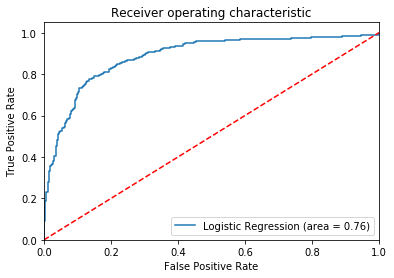

In [222]:
rocAucCurve(classifier)

Evaluating the Algorithm

### 76% correct prediction

## The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Answer the following questions for the multivariate (multiple) linear models:
<br/>
 <br/>
 **Is the relationship significant?**
 <br/>
  Yes, the relationship is significant.
   <br/>
    <br/>
**Are any model assumptions violated?** 
 <br/>
  No,the model assumptions are not violated.
   <br/>
    <br/>
**Does the model make sense? Interpret the meaning of each independent variable.**
 <br/>
  Yes it makes sense.
   <br/>
    <br/>
**Cross-validate the model. How well did it do?**
 <br/>
   The correct prediction is about 76%
    <br/>
     <br/>
**Calculate the probability of getting the dependent variable**
 <br/>
   76%

# Multicolinearity and step-wise regression

Multicolinearity in a multiple regression is a phenomenon in which two or more predictors are related to each other, and hence one predictor can be used to predict the value of other.Multicolinearity can be detected using the Variance Inflation Factor(VIF).

As we can see in the previous steps that by adding an interaction term our cross validation error gets lower.

## Checking for VIF for eliminating multicollinearity and overfitting

In [223]:
df.corr()

,Serial No,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
Serial No,1.000000,0.049197,-0.511457,-0.411799,0.035299,0.000347,-0.003382,-0.055501
room_type,0.049197,1.000000,-0.048883,-0.048025,0.322152,0.165773,0.157875,0.183045
reviews,-0.511457,-0.048883,1.000000,0.361947,-0.068578,-0.142822,-0.119952,-0.128034
overall_satisfaction,-0.411799,-0.048025,0.361947,1.000000,-0.012866,-0.043821,-0.082298,-0.088495
accommodates,0.035299,0.322152,-0.068578,-0.012866,1.000000,0.801533,0.546785,0.447689
bedrooms,0.000347,0.165773,-0.142822,-0.043821,0.801533,1.000000,0.623808,0.462481
bathrooms,-0.003382,0.157875,-0.119952,-0.082298,0.546785,0.623808,1.000000,0.425678
price,-0.055501,0.183045,-0.128034,-0.088495,0.447689,0.462481,0.425678,1.000000


In [224]:
# choose attributes which shows relation
x = df[['room_type','reviews','overall_satisfaction','accommodates','bedrooms',
        'bathrooms','price']]

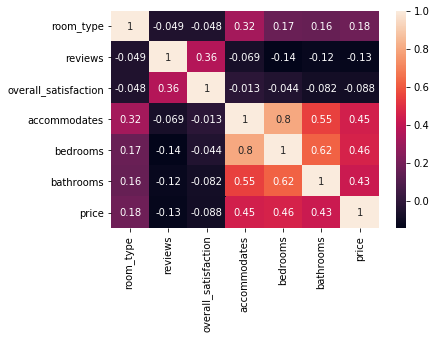

In [225]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

# Step 1: Run a multiple regression

In [226]:
%%capture
#gather features
df1=df[['reviews','overall_satisfaction', 'accommodates','bedrooms','bathrooms','price']]
features = "+".join(df1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('reviews ~' + features, df1, return_type='dataframe')

# Step 2: Calculate VIF Factors

In [227]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Step 3: Inspect VIF Factors

In [228]:

vif.round(1)

,VIF Factor,features
0,10.3,Intercept
1,1.2,reviews
2,1.2,overall_satisfaction
3,2.9,accommodates
4,3.3,bedrooms
5,1.7,bathrooms
6,1.4,price


## None of the predictors in our case has a high value of VIF. Hence,would not need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.

Answer the following:
<br/>
 <br/>
 **Is there any multi-colinearity in the model?**
 <br/>
  There is not much multi-colinearity.
   <br/>
    <br/>
**In the multiple regression models are predictor variables independent of all the other predictor variables?** 
 <br/>
  Yes
   <br/>
    <br/>
**Cross-validate the model. How well did it do?**
 <br/>
   None of the predictors have high VIF,So we would not need to doscard any of the variables.
    <br/>
     <br/>


# Regularization

Regularization is a method for "constraining" or "regularizing" the **size of the coefficients**, thus "shrinking" them towards zero.
<br/>
It reduces model variance which **minimizes overfitting**.
<br/>
For a regularized linear regression model, we **minimize the sum of RSS and a "penalty term"** that penalizes coefficient size.


## Ridge Regression
<br/>
Ridge regression (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$
<br/>
<br/>

### We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature variable. And as we know, large coefficients leads to overfitting.

In [229]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.


0.21583637835641956

# Conclusion

Based on the analysis of the dataset, we have taken the room_type as the independent variable and rest of the variable as the dependent variables. 
<br/>
<br/>
So we determine which room_type is most preferred in Seattle based on the indepemdent variables such as reviews, overall_satisfaction, accomodates, bedrooms and bathrooms.
<br/>
<br/>
We perform the **Linear model, has perfect R2 value of 0.735 and which gives the cross-validation error of 0.4267684149255205,** which is pretty good. 
Then, we add an **interaction term** which helps **in reducing the cross-validation error from 0.4267684149255205 to 
0.3813306773908479,** and this will be model we will be looking for. 
<br/>
<br/>
Secondly, the **Logistic model is performed which gives an correct predition of 76%.** The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner), which in our case is far away from the line. 
<br/>
<br/>
**So we have the Linear and Logistic prediction values almost same.**
<br/>
<br/>
Next,we perform the **Multicolinearity and step-wise regression. Colinearity** is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. 
**Multicolinearity** on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear. 
<br/>
<br/>
And it can detected using **Variance Inflation Factor(VIF).The Variance Inflation Factor (VIF)** is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone. 
None of the predictors in our case has a high value of VIF. Hence,would not need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.

# Contributions

By own: 55%
By external resource: 45%
<br/>
<br/>

By own are things which i changed according to my requirements of my dataset and predictions.
The external resources are the ones which i didnt change anything except the column name and copy pasted.

# Citations

Below are the links from where the information for the entire notebook has been extracted:
<br/>

https://etav.github.io/python/vif_factor_python.html
http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis
https://github.com/Kulbear/deep-learning-coursera/blob/master/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning%2C%20Regularization%20and%20Optimization/Regularization.ipynb
https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression
https://github.com/Jaouadeddadsi/Seattle-Airbnb-Open-Data/blob/master/busiest_times_to_visit_Seattle.ipynb
https://www.kaggle.com/dangermc/are-expensive-airbnbs-better
https://www.google.com/search?q=logistic+regression&rlz=1C1CHBF_enUS813US813&oq=logistic+regression&aqs=chrome..69i57j69i60l3j0l2.5185j1j7&sourceid=chrome&ie=UTF-8
https://www.kaggle.com/chiahuiliu/avocado-exploratory-and-regression
https://www.bioconductor.org/packages/release/bioc/vignettes/ComplexHeatmap/inst/doc/s9.examples.html
https://www.hotjar.com/blog/heatmaps
https://www.kaggle.com/rbyron/simple-linear-regression-models
https://stackoverflow.com/questions/26440433/ipython-notebook-read-string-from-raw-text-cell
https://imotions.com/blog/analyze-heat-maps/
https://stats.stackexchange.com/questions/166950/alpha-parameter-in-ridge-regression-is-high

# License

MIT License

Copyright (c) [2019] [Suraksha Jadhav]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.